# Lab 6


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [2]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [3]:
filename="SUSY-Small.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [4]:
df.head()

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [5]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [9]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [11]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

In [12]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 18)) while a minimum of 1 is required by LinearDiscriminantAnalysis.

<Figure size 640x480 with 0 Axes>

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

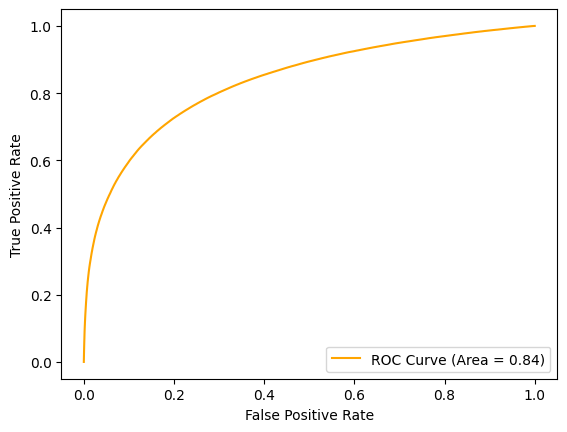

In [8]:
Fisher.predict(X_Test)

from sklearn.metrics import roc_curve, auc

fpr,tpr, _ = roc_curve(y_Test,Fisher.decision_function(X_Test))
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr,color = 'orange', label = 'ROC Curve (Area = %0.2f)'%roc_auc)
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

Sig f1 score: 0.7317508576394607
Bkg f1 score: 0.0
Mix f1 score: 0.1047700984609502


/tmp/ipykernel_151/2744988379.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_mix = np.concatenate((y_sig[:N_sig],y_bkg[:N_bkg]))
/home/efaz_h/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/efaz_h/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


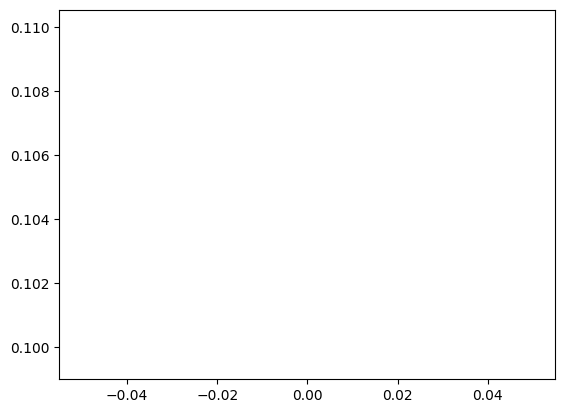

In [11]:
from sklearn.metrics import f1_score

f1_score(y_Test, Fisher.predict(X_Test,))

threshold=-0.1
f1_score(y_Test, np.array(Fisher.decision_function(X_Test)>threshold,dtype='int'))

X_sig = X_Test[y_Test==1]
y_sig = y_Test[y_Test==1]

X_bkg = X_Test[y_Test==0]
y_bkg = y_Test[y_Test==0]

print("Sig f1 score:", f1_score(y_sig, Fisher.predict(X_sig)))
print("Bkg f1 score:", f1_score(y_bkg, Fisher.predict(X_bkg)))

N_sig=1000
N_bkg=100000
X_mix = np.concatenate((X_sig[:N_sig],X_bkg[:N_bkg]))
y_mix = np.concatenate((y_sig[:N_sig],y_bkg[:N_bkg]))

print("Mix f1 score:", f1_score(y_mix, Fisher.predict(X_mix)))

plt.plot(f1_score(y_mix, Fisher.predict(X_mix)))

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

Coefficients: 
 [ 2.01269531e-01  4.44104244e-05 -4.95184217e-05  9.32588205e-02
  4.73609212e-06 -9.27435878e-05  1.48038862e-01  3.64196966e-04
  1.32599475e-02  2.52460677e-02 -4.23469012e-02  9.33089741e-03
 -1.86259741e-01 -3.07443112e-02 -1.47954995e-01  1.53128287e-01
 -1.02345875e-02  4.63708222e-01]
Mean squared error: 0.18
Coefficient of determination: 0.28


ValueError: x and y must be the same size

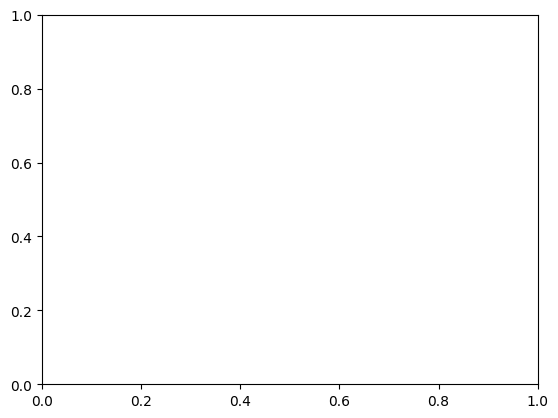

In [32]:
#linear Models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
reg.fit(X_Test,y_Test)
y_Pred = reg.predict(X_Test)

print("Coefficients: \n", reg.coef_)
# The mean squared error value
print("Mean squared error: %.2f" % mean_squared_error(y_Test,y_Pred))
# The coefficient of determination: where a 1 = perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_Test, y_Pred))

plt.scatter(X_Test,y_Test, color = 'r')
plt.plot(X_Test,y_Test, color = 'black', linewidth = 3)

plt.xticks()
plt.yticks()
plt.show()


In [29]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_Test,y_Test)
clf.coef_

/home/efaz_h/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[ 2.02716548e+00,  2.61355508e-03, -8.94531834e-02,
         1.43800912e-01, -2.36445933e-02, -2.16969132e-02,
         3.45463396e+00, -4.93097889e-02, -3.47244566e-01,
         2.58555652e-01,  3.06015326e-01, -9.22959207e-01,
        -1.09107168e+00,  4.43810902e-02, -1.70420949e+00,
         3.55896124e-01, -5.13284007e-01,  4.82314311e-01]])

In [24]:
# Baysian Ridge Regression:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
reg.fit(X_Test,y_Test)

reg.coef_

array([ 2.01259684e-01,  4.43962471e-05, -4.95512123e-05,  9.32020333e-02,
        4.78894687e-06, -9.29001984e-05,  1.48033250e-01,  3.64129068e-04,
        1.32544196e-02,  2.52591689e-02, -4.23431804e-02,  9.41099471e-03,
       -1.86129344e-01, -3.07301577e-02, -1.47901610e-01,  1.53048017e-01,
       -1.02786324e-02,  4.63392981e-01])

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

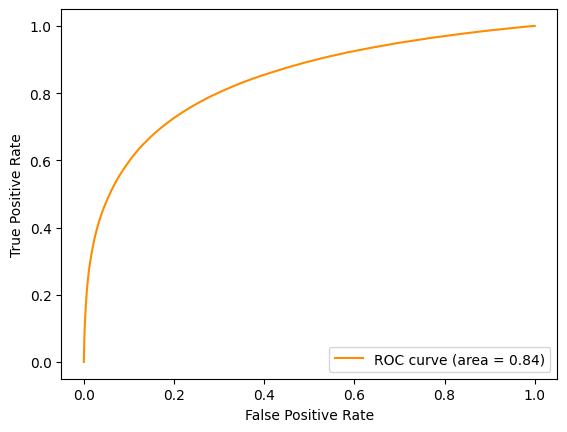

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [44]:
from sklearn.metrics import roc_auc_score ,accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

#Accuracy Score:
#accuracy_score(y_Test,y_Train)

# ROC/AUC Score
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_Test, y_Test)
roc1 = roc_auc_score(y_Test,clf.decision_function(X_Test))
print("ROC_AUC Score: ",roc1)

#Precision Score:
#precis = precision_score(y_Test, y_Train, average=None)
#print("Precision Score: ", precis)

#Recall
#recall = recall_score(y_Test,y_Train, average = 'weighted')
#print("Recall Score: ",recall)

#F1-Score
f1 = f1_score(y_Test, Fisher.predict(X_Test,))
print("F1 Score: ",f1)

ROC_AUC Score:  0.8582184934919559
F1 Score:  0.6855618176372894
